In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from package import function
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv").cardio

The score is 0.721381 for Logistic Regression baseline


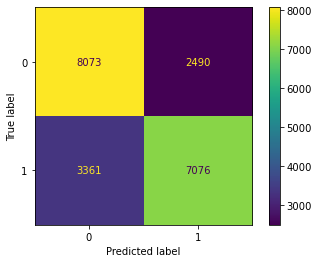

In [25]:
logreg_baseline = LogisticRegression(max_iter = 1000)
logreg_baseline.fit(Xtrain,ytrain)
y_pred = logreg_baseline.predict(Xtest)
probTest = logreg_baseline.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Logistic Regression baseline",logreg_baseline.score(Xtest,ytest),y_pred,ytest)

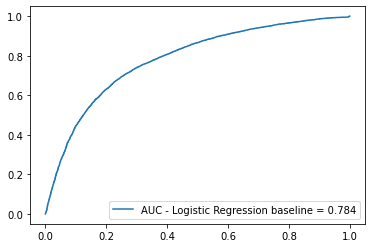

In [26]:
function.eval_auc("Logistic Regression baseline",ytest,probTest)

In [27]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(logreg_baseline, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'solver': 'liblinear'}

In [28]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [29]:
param_grid = {'penalty':['l1','l2']}
clf = GridSearchCV(logreg_baseline, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

/Users/hanyunguo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hanyunguo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hanyunguo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hanyunguo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logis

{'penalty': 'l2'}

In [30]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear', penalty = 'l2')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [31]:
param_grid = {'C':[73, 72, 74]}
clf = GridSearchCV(logreg_baseline, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'C': 73}

The score is 0.721476 for Logistic Regression final


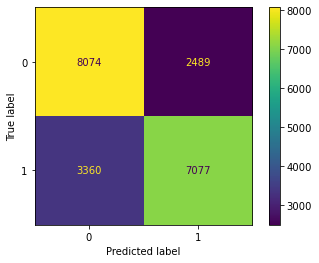

In [32]:
logreg_final = LogisticRegression(max_iter = 100000, solver = 'liblinear', penalty = 'l2', C = 73)
logreg_final.fit(Xtrain,ytrain)
y_pred = logreg_final.predict(Xtest)
probTest = logreg_final.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Logistic Regression final",logreg_final.score(Xtest,ytest),y_pred,ytest)

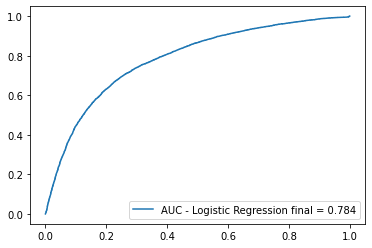

In [33]:
function.eval_auc("Logistic Regression final",ytest,probTest)

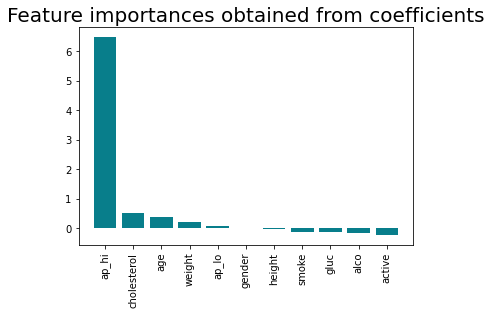

In [34]:
importances = pd.DataFrame(data={
    'Attribute': Xtrain.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by = 'Importance', ascending = False)
plt.bar(x = importances['Attribute'], height = importances['Importance'], color = '#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.xticks(rotation='vertical')
plt.show()